In [1]:
# Importamos las librerias que vamos a utilizar
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Abrimos el archivo 'Estadisticas consultas catálogo-reportresults.csv'
data_frame = pd.read_csv("d:/Users/Laura/Desktop/Espacio Integrador II/3 - Practica Academica/Practica-Acad-mica/datos/Estadísticas consultas catálogo-reportresults.csv", sep=';')

### Estrucutura del archivo
##### Primer contacto con el archivo

In [3]:
# Vemos los primeros datos del archivo
data_frame.head()

,sessionid,query_desc,type,total,time,branchcode,categorycode
0,8b973f78de404b6eb6548e4a229cb725,"au,wrdl: bronzino",biblio,16,2018-10-17 15:27:49,FING,DOCENTE
1,8b973f78de404b6eb6548e4a229cb725,"au,wrdl: bronzino",biblio,16,2018-10-17 15:28:25,FING,DOCENTE
2,8b973f78de404b6eb6548e4a229cb725,"au,wrdl: webster",biblio,10,2018-10-17 15:29:51,FING,DOCENTE
3,8b973f78de404b6eb6548e4a229cb725,"au,wrdl: webster",biblio,10,2018-10-17 15:30:02,FING,DOCENTE
4,8b973f78de404b6eb6548e4a229cb725,"au,wrdl: webster",biblio,10,2018-10-17 15:30:13,FING,DOCENTE


In [4]:
# Consultamos los tipos de variable de cada columna
print(data_frame.dtypes)

sessionid       object
query_desc      object
type            object
total            int64
time            object
branchcode      object
categorycode    object
dtype: object


In [5]:
# Vemos las medidas estadisticas basicas para la variable 'total'
estadisticas = data_frame['total'].describe()
print("Estadísticas descriptivas de la columna 'total':")
estadisticas

Estadísticas descriptivas de la columna 'total':


count     2535.000000
mean       190.157791
std        820.385073
min          0.000000
25%          2.000000
50%          7.000000
75%         33.000000
max      11525.000000
Name: total, dtype: float64

In [6]:
# Nos fijamos la cantidad de veces que el sistema no encontró ningun material con la busqueda ingresada por el usuario
cero_resultados = data_frame[data_frame['total'] == 0]
print(f"Las búsquedas totales que no tuvieron ningun resultado son: {len(cero_resultados)}")

porcentaje_cero_resultados = len(cero_resultados) / len(data_frame)
print(f"Esto representa un porcentaje del {round(porcentaje_cero_resultados, 2)} %")

Las búsquedas totales que no tuvieron ningun resultado son: 317
Esto representa un porcentaje del 0.13 %


In [7]:
# Buscamos el valor maximo de resultados que logro devolver el sistema
max_resultados = data_frame['total'].max()
print(f"Máximo de resultados que encontró el sistema: {max_resultados}")

# Encontramos el usuario que realizo esta busqueda
usuario_max_resultados = data_frame[data_frame['total'] == max_resultados]
usuario_max_resultados

Máximo de resultados que encontró el sistema: 11525


,sessionid,query_desc,type,total,time,branchcode,categorycode
1394,7a7a070b4c157d901bc30c69555b7dfa,"kw,wrdl: c++,",biblio,11525,2022-11-01 11:30:25,FING,BIBLIOTECA


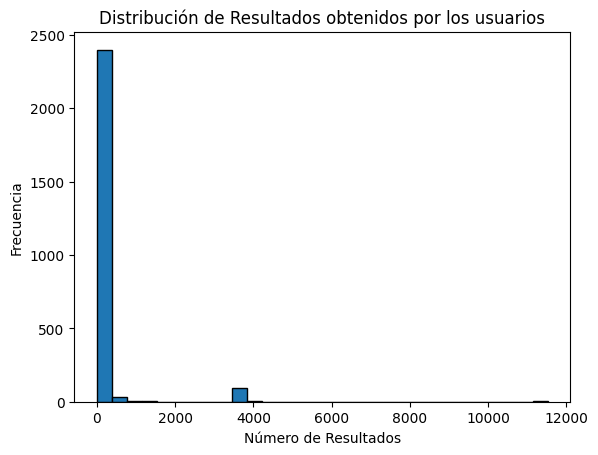

In [8]:
# Histograma de la columna 'total'
plt.hist(data_frame['total'], bins=30, edgecolor='black')
plt.title('Distribución de Resultados obtenidos por los usuarios')
plt.xlabel('Número de Resultados')
plt.ylabel('Frecuencia')
plt.show()

### Identificación de las variables más importantes y exploración de los datos
##### Se identificarán las variables que ayudarán a resolver nuestro problema. Además de hacer una exploración de los datos que nos brinde más información sobre los datos

In [9]:
# Filtramos el data frame, nos quedaremos con las variables que resolverán nuestro problema
df_filtrado = data_frame[['sessionid', 'query_desc','total','time']]
df_filtrado.head()

# Hacemos una copia del data frame filtrado para poder trabajar en otras ramas
df_auxiliar = df_filtrado.copy()

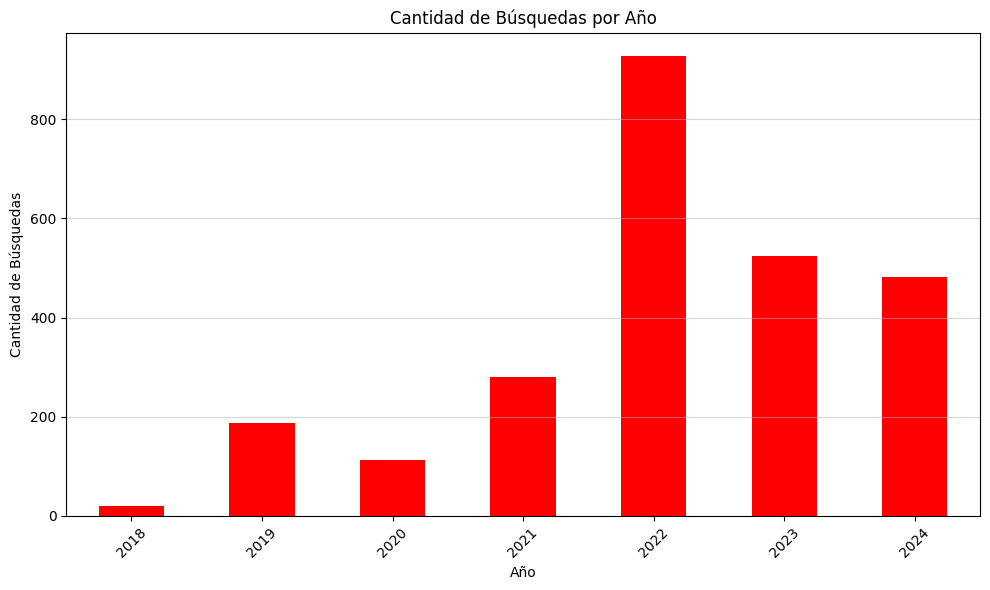

In [10]:
# Pasamos el 'time' de la busqueda a formato tiempo para extraer el año y contabilizarlos
df_auxiliar['time'] = pd.to_datetime(df_filtrado['time'])
df_auxiliar['año'] = df_auxiliar['time'].dt.year

total_busquedas = df_auxiliar['año'].value_counts().sort_index()

# Grafico para el total de busquedas por año
plt.figure(figsize=(10, 6))
total_busquedas.plot(kind='bar', color='red')
plt.title('Cantidad de Búsquedas por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Búsquedas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.tight_layout()
plt.show()

In [11]:
# Buscamos el usuario con más búsquedas dentro del sistema
maximo_usuario_busqueda = df_auxiliar['sessionid'].value_counts().sort_index()
print("El usuario con más busquedas en el sistema es: ")
maximo_usuario_busqueda[maximo_usuario_busqueda == maximo_usuario_busqueda.max()]

El usuario con más busquedas en el sistema es: 


sessionid
e03def7e497ec6c9bb60f290d5247dc8    49
Name: count, dtype: int64

In [12]:
cantidad_usuarios = df_auxiliar['sessionid'].nunique()
print("La cantidad de usuarios que hicieron una búsqueda en el sistema son:", cantidad_usuarios)

La cantidad de usuarios que hicieron una búsqueda en el sistema son: 853


### Etapa de limpieza

In [13]:
# Se eliminan los registros duplicados
data_frame = data_frame.drop_duplicates()

# Pasamos de tener 2535 cantidad de filas a tener 2470 registros, eliminando 65 resgistros duplicados

In [14]:
# Nos fijamos si las columnas tienen algún valor nulo
data_frame.info()

# Podemos observar que de las 2470 filas resultantes, ninguna posee valores nulos

<class 'pandas.core.frame.DataFrame'>
Index: 2470 entries, 0 to 2534
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sessionid     2470 non-null   object
 1   query_desc    2470 non-null   object
 2   type          2470 non-null   object
 3   total         2470 non-null   int64 
 4   time          2470 non-null   object
 5   branchcode    2470 non-null   object
 6   categorycode  2470 non-null   object
dtypes: int64(1), object(6)
memory usage: 154.4+ KB


### Preparación de los datos para el análisis estadístico